In [263]:
def sum_squares_error(y, t):
    return 0.5*np.sum((y-t)**2)

In [264]:
import numpy as np

t = [0,0,1,0,0,0,0,0,0,0]

y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

print(sum_squares_error(np.array(y),np.array(t)))

y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]

print(sum_squares_error(np.array(y),np.array(t)))

0.09750000000000003
0.5975


In [265]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [266]:
t = [0,0,1,0,0,0,0,0,0,0]

y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]

print(cross_entropy_error(np.array(y),np.array(t)))

0.510825457099338
2.302584092994546


In [267]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test)=\
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [268]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [269]:
np.random.choice(60000,10)

array([49965, 20185, 35451, 36581, 20491, 31731,  9681, 50296, 53407,
       40483])

In [270]:
#정답 레이블이 원-핫 인코딩일 경우
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)

    batch_size = y.shape[0]
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))/batch_size

In [271]:
#정답 레이블이 원-핫 인코딩이 아닐 경우
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)

    batch_size = y.shape[0]
    delta = 1e-7
    return -np.sum(np.log(y[np.arange(batch_size),t]+delta))/batch_size

In [272]:
def numerical_diff(f,x):
    h=10e-50
    return (f(x+h)-f(x))/h

In [273]:
def numerical_diff(f,x):
    h=1e-4
    return (f(x+h)-f(x-h))/(2*h)

In [274]:
def function_1(x):
    return 0.01*(x**2) + 0.1*x

In [275]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

0.1999999999990898


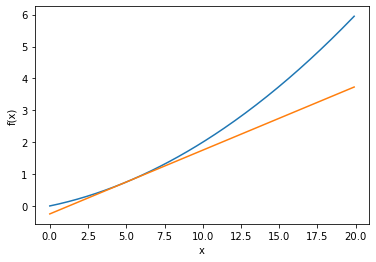

In [276]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

# plt.plot(x,y)
# plt.show()

In [277]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


In [278]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [279]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [280]:
numerical_diff(function_tmp1,3.0)

6.00000000000378

In [281]:
def function_tmp2(x1):
    return 3.0**2.0+x1*x1

In [282]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [283]:
def numerical_gradient(f,x):
    h=1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val+h
        #print(x)
        fxh1 = f(x)

        x[idx] = tmp_val-h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2)/(2*h)
        x[idx] = tmp_val

    return grad

In [284]:
numerical_gradient(function_2, np.array([3.0,4.0]))

array([6., 8.])

No handles with labels found to put in legend.


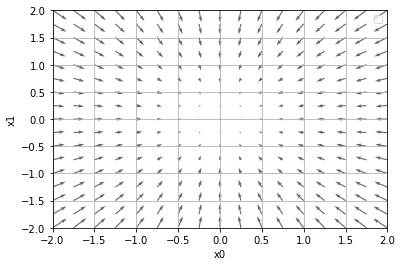

In [285]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()


In [286]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
    return x

In [287]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [288]:
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x,lr=0.1))

[-6.11110793e-10  8.14814391e-10]


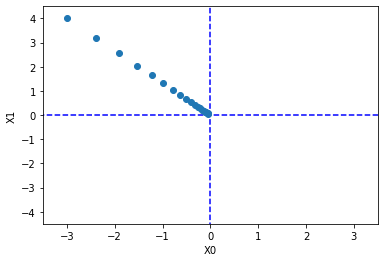

In [289]:
# coding: utf-8
### 책에서 발췌한 코드
import numpy as np 
import matplotlib.pylab as plt
#from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [290]:
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x,lr=1e-10))

(array([-2.99999994,  3.99999992]), array([[-3.        ,  4.        ],
       [-3.        ,  4.        ],
       [-3.        ,  4.        ],
       [-3.        ,  4.        ],
       [-3.        ,  4.        ],
       [-3.        ,  4.        ],
       [-3.        ,  4.        ],
       [-3.        ,  3.99999999],
       [-3.        ,  3.99999999],
       [-2.99999999,  3.99999999],
       [-2.99999999,  3.99999999],
       [-2.99999999,  3.99999999],
       [-2.99999999,  3.99999999],
       [-2.99999999,  3.99999999],
       [-2.99999999,  3.99999999],
       [-2.99999999,  3.99999999],
       [-2.99999999,  3.99999999],
       [-2.99999999,  3.99999999],
       [-2.99999999,  3.99999999],
       [-2.99999999,  3.99999998],
       [-2.99999999,  3.99999998],
       [-2.99999999,  3.99999998],
       [-2.99999999,  3.99999998],
       [-2.99999999,  3.99999998],
       [-2.99999999,  3.99999998],
       [-2.99999998,  3.99999998],
       [-2.99999998,  3.99999998],
       [-2.99999998

In [291]:
import sys, os
sys.path.append(os.pardir)
import numpy as np

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self,x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)

        return loss

In [292]:
net = simpleNet()
print(net.W)

[[-0.0765948   0.89332175  0.59906186]
 [ 0.15560744 -1.09606781  1.73356947]]


In [293]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.09408981 -0.45046797  1.91964964]


In [294]:
np.argmax(p)

2

In [295]:
t = np.array([0,1,0])

In [296]:
net.loss(x, t)

2.596930791612911

In [297]:
def f(W):
    return net.loss(x, t)

In [298]:
dW = numerical_gradient(f, net.W)

In [299]:
print(dW)

[[ 0.07705766 -0.55529818  0.47824052]
 [ 0.11558649 -0.83294727  0.71736078]]


In [300]:
#2층 신경망 클래스 구현
import sys,os
sys.path.append(os.pardir)

def identity_function(x):
    return x


def step_function(x):
    return np.array(x > 0, dtype=np.int)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)
    

def relu(x):
    return np.maximum(0, x)


def relu_grad(x):
    grad = np.zeros(x)
    grad[x>=0] = 1
    return grad
    

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))


def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [301]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

train_acc_list = []
test_acc_list = []

iters_num = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
#iter_per_epoch = max(train_size / batch_size, 1)
iter_per_epoch = 1
print(iter_per_epoch)

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

1


In [302]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.numerical_gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.09035, 0.0892
train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.10218333333333333, 0.101


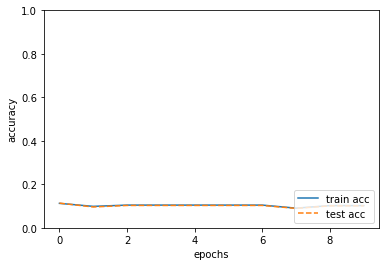

In [303]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()